# Analysis of Direct AM vs Latent AM Simulations

This notebook compares the PGS1 correlations between Direct Assortative Mating (DirectAM) and Latent Assortative Mating (LatentAM) conditions across different relationship types.

In [18]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Load summary statistics from both conditions
direct_am_path = "uni_relationship_summary_statistics.csv"
file_pgs_path = "../Ref/file_pgs.csv"

# Read the CSV files
direct_am1 = pd.read_csv(direct_am_path, header=[0, 1], index_col=[0, 1])
direct_am2 = pd.read_csv(direct_am_path, header=[0, 1], index_col=[0, 1])

# Read the file_pgs.csv
file_pgs = pd.read_csv(file_pgs_path)

# Filter for PGS1 only and extract mean correlations
direct_pgs1 = direct_am1.xs('PGS1', level='Variable')[('Correlation', 'mean')]
direct_pgs2 = direct_am2.xs('PGS2', level='Variable')[('Correlation', 'mean')]

# Create a mapping from file_pgs 'type' to correlation values
# Map relationship type codes to readable names
type_mapping = {
    's': 'S',
    'hs': 'HSFS',
    '1c': 'PSC',
    'h1c': 'HSFS',  # half-first cousin
    '2c': 'PPSCC',  # second cousin
    'm': 'M',
    'ms': 'MS',
    'sms': 'SMS',
    'msm': 'MSM',
    'msc': 'MSC',
    'smsc': 'SMSC',
    'smsm': 'SMSM',
    'smsms': 'SMSMS',
    'msmsm': 'MSMSM',
    'msmsc': 'MSMSC',
    'psmsc': 'PSMSC',
    'smsmsc': 'SMSMSC',
    'msmsms': 'MSMSMS'
}

# Create Series with relationship type as index
file_pgs['RelType'] = file_pgs['type'].map(type_mapping)
file_pgs_corr = file_pgs.set_index('RelType')['corr']

print(f"Number of relationship types in simulation: {len(direct_pgs1)}")
print(f"Number of relationship types in file_pgs: {len(file_pgs_corr)}")
print("\nFile PGS relationship types:")
print(file_pgs_corr)

Number of relationship types in simulation: 16
Number of relationship types in file_pgs: 18

File PGS relationship types:
RelType
S         0.559310
HSFS      0.310069
PSC       0.194235
HSFS      0.168250
PPSCC     0.086119
M         0.135207
MS        0.096101
SMS       0.059769
MSM       0.063064
MSC       0.078392
SMSC      0.053565
SMSM      0.053630
SMSMS     0.066581
MSMSM     0.026488
MSMSC     0.031413
PSMSC     0.052677
SMSMSC    0.044911
MSMSMS    0.028819
Name: corr, dtype: float64


In [20]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Direct AM1': direct_pgs1,
    'Direct AM2': direct_pgs2
})

# Reset index to avoid duplicate index issues
comparison_df = comparison_df.reset_index()

# Add file_pgs correlations by merging on relationship type
comparison_df = comparison_df.merge(
    file_pgs_corr.reset_index().rename(columns={'RelType': 'RelationshipPath', 'corr': 'File PGS'}),
    on='RelationshipPath',
    how='left'
)

# Set RelationshipPath back as index
comparison_df = comparison_df.set_index('RelationshipPath')

# Sort by Direct AM1 values for better visualization
comparison_df = comparison_df.sort_values('Direct AM1', ascending=False)

print("Comparison DataFrame:")
print(comparison_df)

Comparison DataFrame:
                  Direct AM1  Direct AM2  File PGS
RelationshipPath                                  
S                     0.5705      0.5650  0.559310
PSC                   0.2070      0.1992  0.194235
M                     0.1448      0.1330  0.135207
MS                    0.1088      0.0980  0.096101
PPSCC                 0.0846      0.0787  0.086119
SMS                   0.0818      0.0720  0.059769
MSC                   0.0766      0.0689  0.078392
SMSC                  0.0577      0.0508  0.053565
MSM                   0.0459      0.0405  0.063064
PSMSC                 0.0404      0.0355  0.052677
SMSM                  0.0345      0.0297  0.053630
SMSMS                 0.0262      0.0220  0.066581
MSMSC                 0.0236      0.0208  0.031413
SMSMSC                0.0181      0.0154  0.044911
MSMSM                 0.0142      0.0124  0.026488
MSMSMS                0.0106      0.0091  0.028819


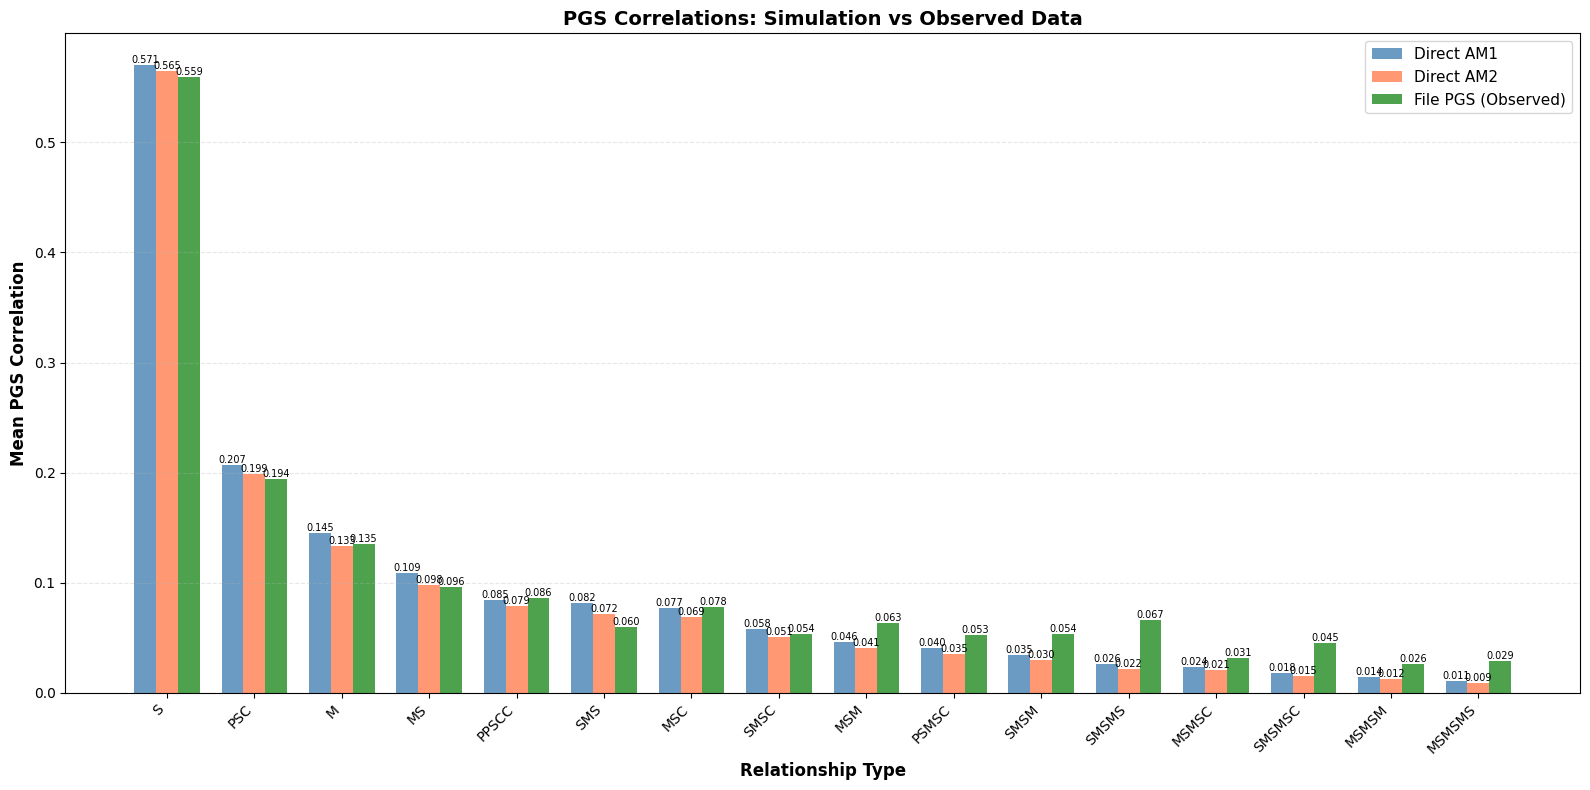


Plot created successfully!

Relationship types with File PGS data: 16
Relationship types without File PGS data: 0


In [21]:
# Create bar plot comparing PGS1 correlations
fig, ax = plt.subplots(figsize=(16, 8))

# Set up bar positions
x = np.arange(len(comparison_df))
width = 0.25

# Create bars
bars1 = ax.bar(x - width, comparison_df['Direct AM1'], width, 
               label='Direct AM1', alpha=0.8, color='steelblue')
bars2 = ax.bar(x, comparison_df['Direct AM2'], width, 
               label='Direct AM2', alpha=0.8, color='coral')
bars3 = ax.bar(x + width, comparison_df['File PGS'], width, 
               label='File PGS (Observed)', alpha=0.8, color='forestgreen')

# Customize plot
ax.set_xlabel('Relationship Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean PGS Correlation', fontsize=12, fontweight='bold')
ax.set_title('PGS Correlations: Simulation vs Observed Data', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):  # Skip NaN values
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom' if height > 0 else 'top', 
                    fontsize=7, rotation=0)

plt.tight_layout()
plt.show()

print("\nPlot created successfully!")
print(f"\nRelationship types with File PGS data: {comparison_df['File PGS'].notna().sum()}")
print(f"Relationship types without File PGS data: {comparison_df['File PGS'].isna().sum()}")

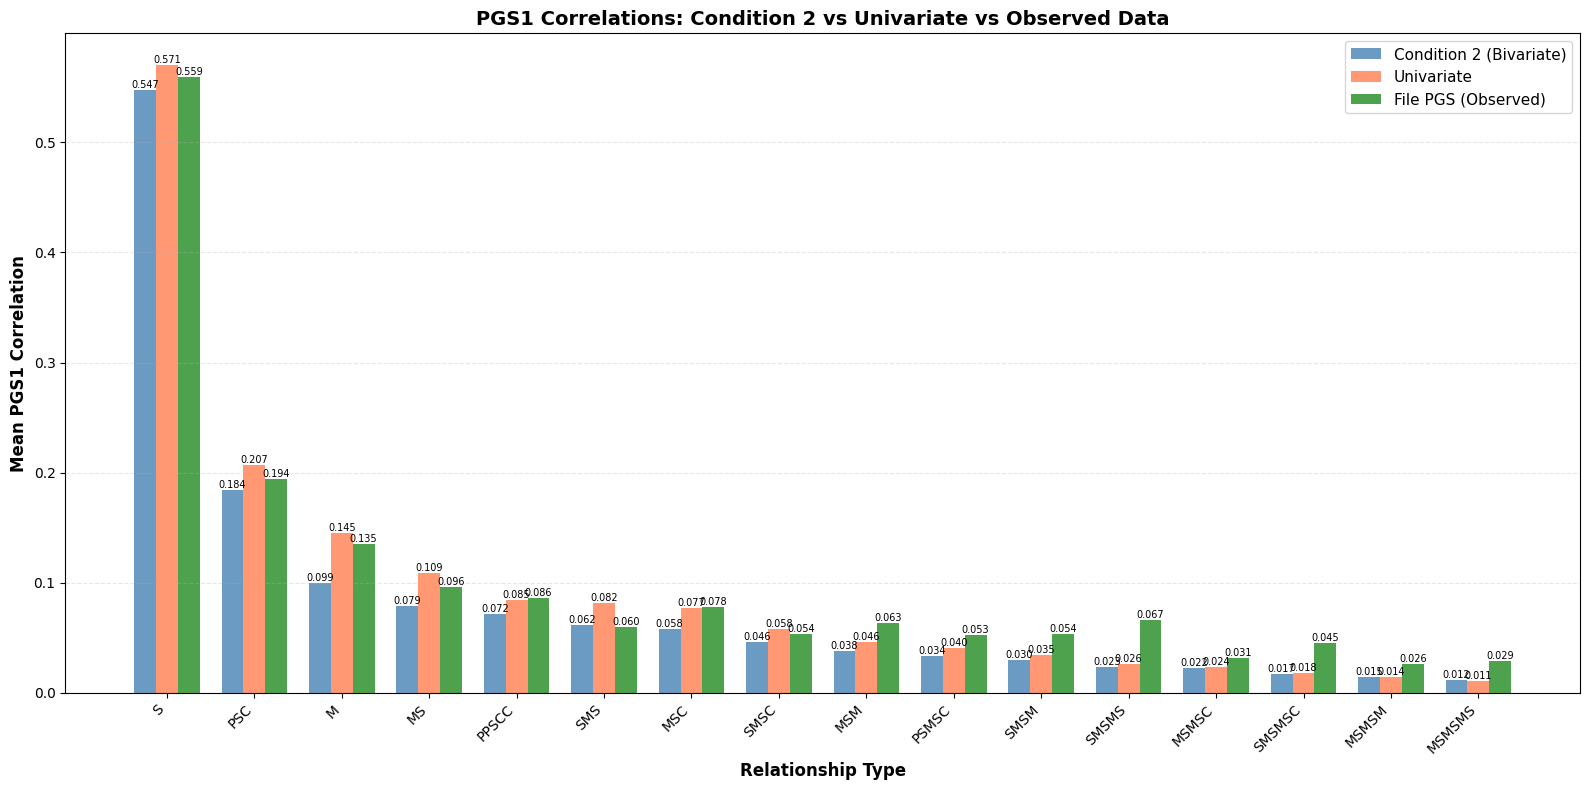


Condition 2 comparison plot created successfully!
Relationship types with File PGS data: 16
Relationship types without File PGS data: 0


In [24]:
# Create bar plot for Condition 2 comparison
fig, ax = plt.subplots(figsize=(16, 8))

# Set up bar positions
x = np.arange(len(condition2_comparison))
width = 0.25

# Create bars
bars1 = ax.bar(x - width, condition2_comparison['Condition 2 (Bivariate)'], width, 
               label='Condition 2 (Bivariate)', alpha=0.8, color='steelblue')
bars2 = ax.bar(x, condition2_comparison['Univariate'], width, 
               label='Univariate', alpha=0.8, color='coral')
bars3 = ax.bar(x + width, condition2_comparison['File PGS (Observed)'], width, 
               label='File PGS (Observed)', alpha=0.8, color='forestgreen')

# Customize plot
ax.set_xlabel('Relationship Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean PGS1 Correlation', fontsize=12, fontweight='bold')
ax.set_title('PGS1 Correlations: Condition 2 vs Univariate vs Observed Data', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(condition2_comparison.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):  # Skip NaN values
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom' if height > 0 else 'top', 
                    fontsize=7, rotation=0)

plt.tight_layout()
plt.show()

print("\nCondition 2 comparison plot created successfully!")
print(f"Relationship types with File PGS data: {condition2_comparison['File PGS (Observed)'].notna().sum()}")
print(f"Relationship types without File PGS data: {condition2_comparison['File PGS (Observed)'].isna().sum()}")

In [23]:
# Load Condition 2 bivariate data
condition2_path = "bi_condition2_relationship_summary_statistics.csv"
condition2_df = pd.read_csv(condition2_path, header=[0, 1], index_col=[0, 1])

# Extract PGS1 correlations for Condition 2
condition2_pgs1 = condition2_df.xs('PGS1', level='Variable')[('Correlation', 'mean')]

# Create comparison dataframe for Condition 2
condition2_comparison = pd.DataFrame({
    'Condition 2 (Bivariate)': condition2_pgs1,
    'Univariate': direct_pgs1
})

# Reset index for merging
condition2_comparison = condition2_comparison.reset_index()

# Add file_pgs correlations by merging
condition2_comparison = condition2_comparison.merge(
    file_pgs_corr.reset_index().rename(columns={'RelType': 'RelationshipPath', 'corr': 'File PGS (Observed)'}),
    on='RelationshipPath',
    how='left'
)

# Set RelationshipPath back as index
condition2_comparison = condition2_comparison.set_index('RelationshipPath')

# Sort by Condition 2 values for better visualization
condition2_comparison = condition2_comparison.sort_values('Condition 2 (Bivariate)', ascending=False)

print("Condition 2 Comparison DataFrame:")
print(condition2_comparison)
print(f"\nNumber of relationship types: {len(condition2_comparison)}")

Condition 2 Comparison DataFrame:
                  Condition 2 (Bivariate)  Univariate  File PGS (Observed)
RelationshipPath                                                          
S                                  0.5474      0.5705             0.559310
PSC                                0.1843      0.2070             0.194235
M                                  0.0993      0.1448             0.135207
MS                                 0.0785      0.1088             0.096101
PPSCC                              0.0720      0.0846             0.086119
SMS                                0.0620      0.0818             0.059769
MSC                                0.0580      0.0766             0.078392
SMSC                               0.0458      0.0577             0.053565
MSM                                0.0382      0.0459             0.063064
PSMSC                              0.0336      0.0404             0.052677
SMSM                               0.0299      0.0345             